## Финальный проект "Предсказание цен на недвижимость в России"

### Исследование данных

#### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Programs\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
DATASET_PATH = '/Users/Елена/Documents/Sberbank-Russian-Housing-Market-master/Data/train.csv'
PREPARED_DATASET_PATH = '/Users/Елена/Documents/Sberbank-Russian-Housing-Market-master/Data/train_prepared.csv'

In [3]:
pd.set_option('display.max_columns', 500)
sns.set(font_scale=1.75)

#### Загрузка данных и логарифмирование целевой переменной

In [4]:
train_df = pd.read_csv(DATASET_PATH, parse_dates=['timestamp'])
train_df['price_doc_log'] = np.log1p(train_df['price_doc'])
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

#### Форма массива

In [5]:
train_df.shape

(30471, 293)

#### Общая информация о массиве

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 293 entries, id to price_doc_log
dtypes: datetime64[ns](1), float64(120), int64(157), object(15)
memory usage: 68.1+ MB


#### Статистические характеристики по столбцам с числовыми значениями

In [7]:
round(train_df.describe(),1)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

#### Процент пропущенных значений по фичам

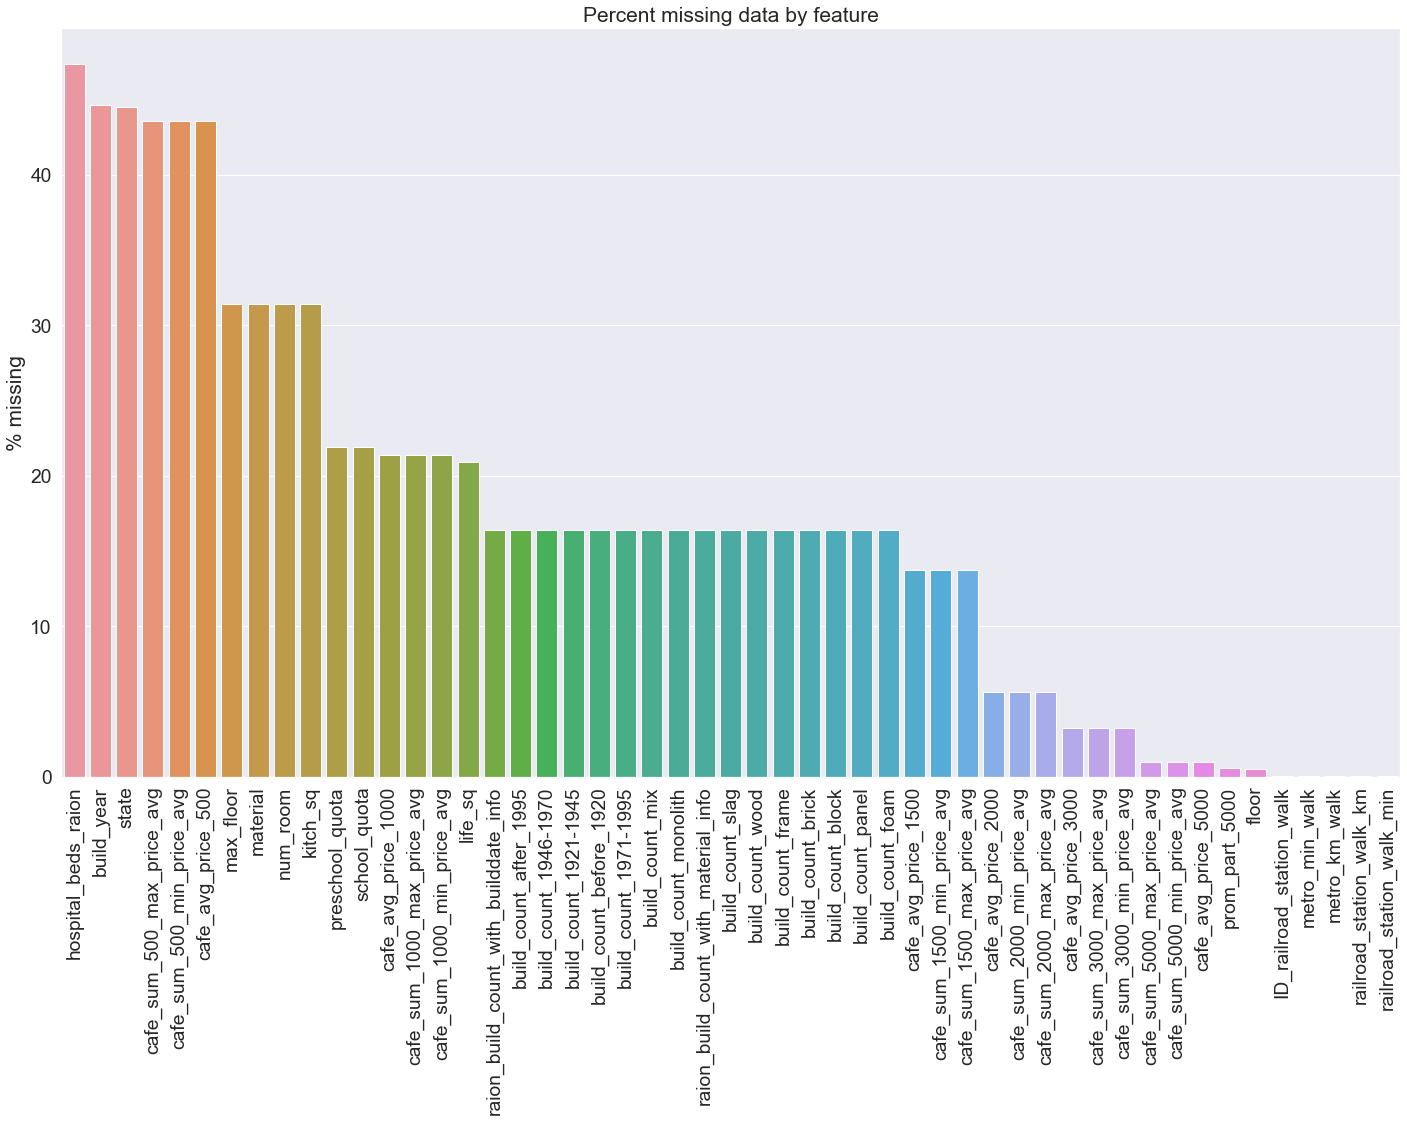

In [13]:
train_na = (train_df.isnull().sum() / len(train_df)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(24, 16))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')
plt.subplots_adjust(top = 0.95, bottom = 0.3)
plt.show()

#### Информация по категориальным признакам

In [14]:
train_df.describe(include=[object])

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


#### Анализ целевой переменной

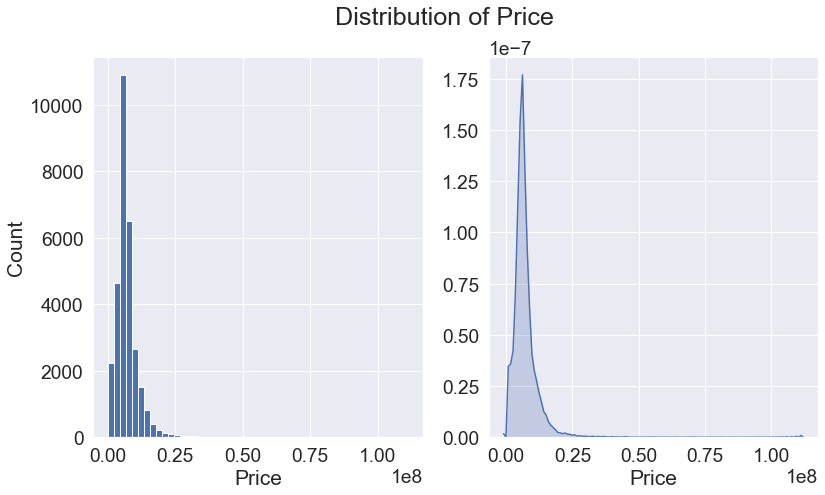

In [18]:
plt.figure(figsize = (13, 7))

plt.subplot(121)
train_df['price_doc'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(train_df['price_doc'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

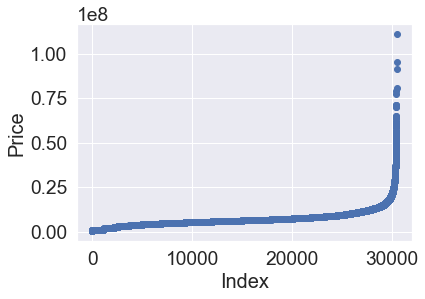

In [19]:
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price_doc.values))
plt.xlabel('Index', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [20]:
# распределение цен довольно неравномерное

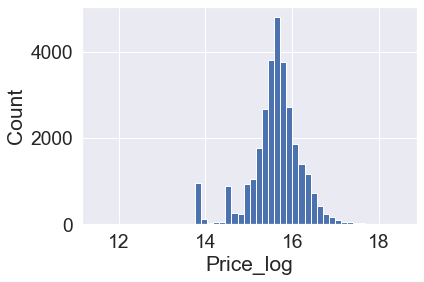

In [21]:
# распределение логарифмированной целевой переменной
plt.hist(train_df['price_doc_log'], bins = 50)
plt.ylabel('Count')
plt.xlabel('Price_log')
plt.show()

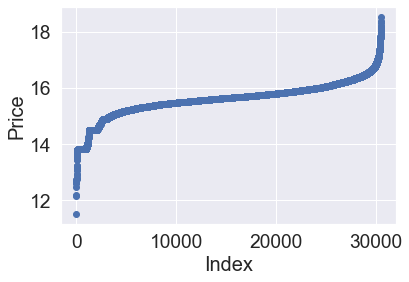

In [22]:
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price_doc_log.values))
plt.xlabel('Index', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

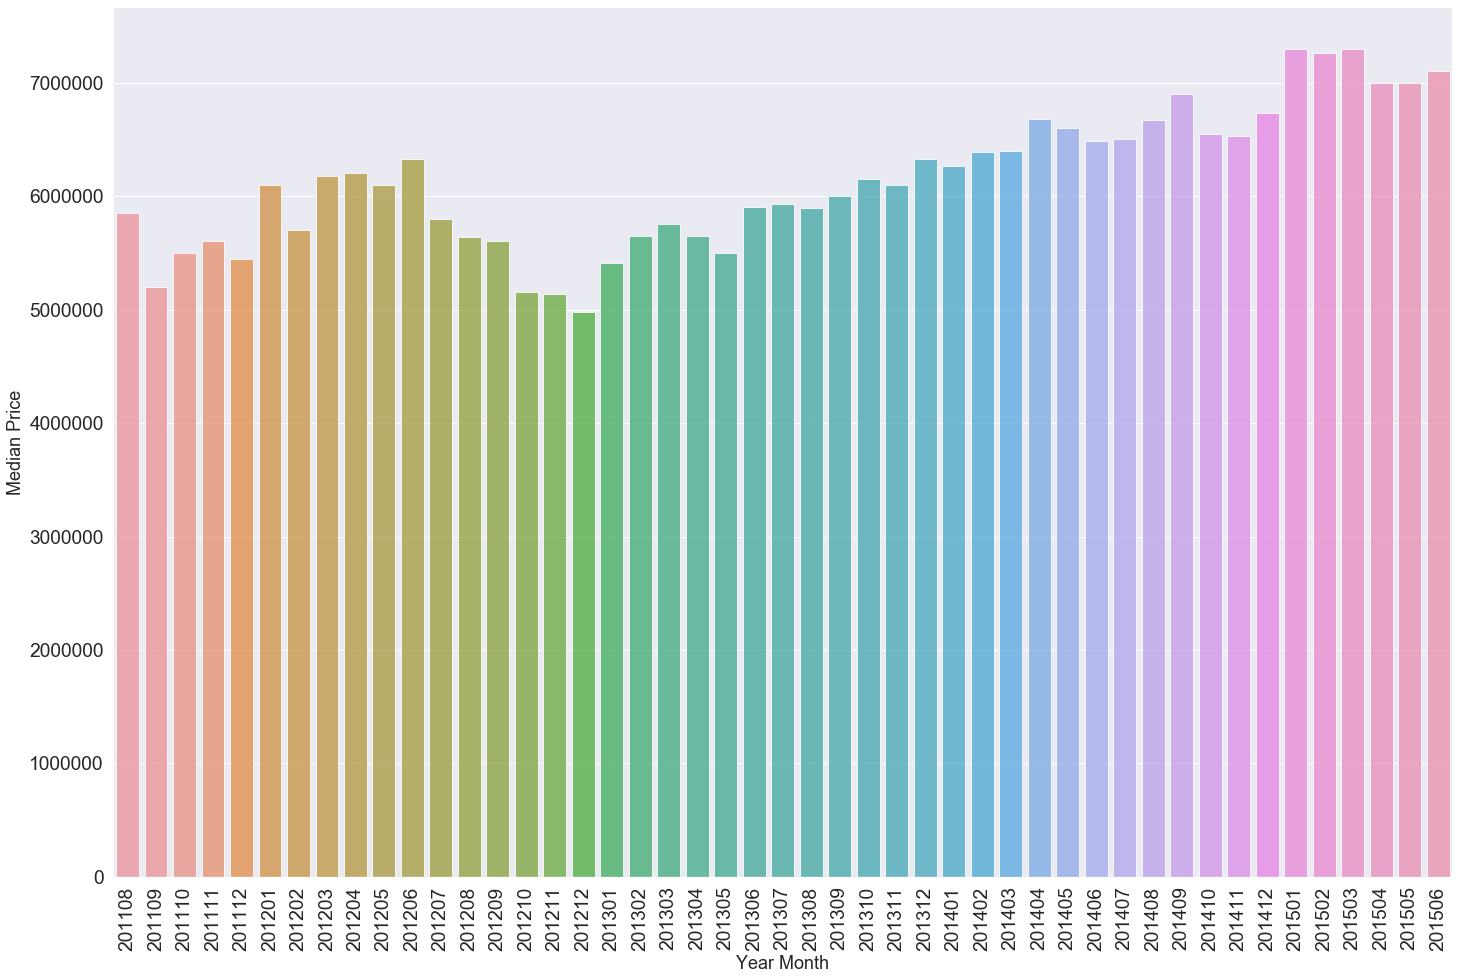

In [24]:
# Как меняется средняя цена на недвижимость с течением времени
train_df['yearmonth'] = train_df['timestamp'].map(lambda x: 100*x.year + x.month)
train_monthgrp = train_df.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()

plt.figure(figsize=(24, 16))
sns.barplot(train_monthgrp.yearmonth.values, train_monthgrp.price_doc.values, alpha=0.8)
plt.ylabel('Median Price', fontsize=18)
plt.xlabel('Year Month', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
# В конце 2012 года происходит значительный спад средней цены 

#### Визуализация зависисмости целевой переменной от других признаков

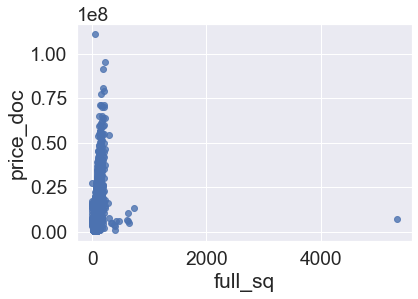

In [28]:
# Зависимость цены от общей площади
sns.regplot(x = 'full_sq', y = 'price_doc', data = train_df, fit_reg = False)
plt.show()

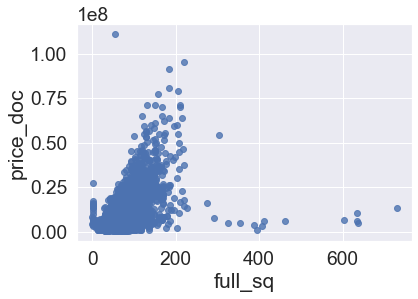

In [29]:
# Зависимость цены от общей площади с удаленным выбросом full_sq
sns.regplot(x = 'full_sq', y = 'price_doc', data = train_df[train_df['full_sq'] < 1000]  , fit_reg = False)
plt.show()

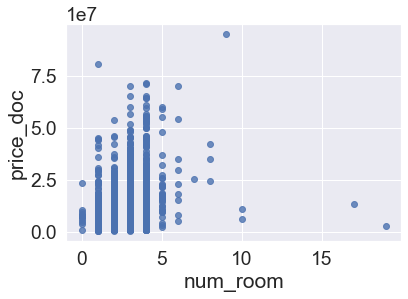

In [30]:
# Зависимость цены от количества комнат
sns.regplot(x = 'num_room', y = 'price_doc', data = train_df, fit_reg = False)
plt.show()

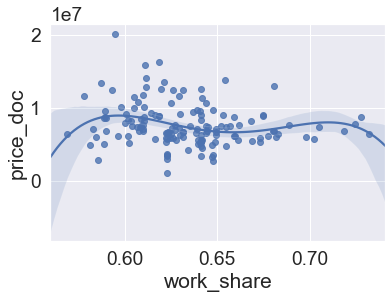

In [33]:
# Зависимость цены от доли занятого населения по районам
train_df['work_share'] = train_df['work_all']/train_df['raion_popul']
train_workshrgrp = train_df.groupby('sub_area')[['work_share', 'price_doc']].mean()
sns.regplot(x = 'work_share', y = 'price_doc', data = train_workshrgrp, order = 4, ci = 95)
plt.show()

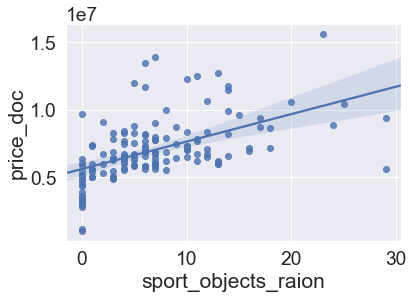

In [34]:
# Зависимость цены от количества спортивных объектов по районам
train_sportsgrp = train_df.groupby('sub_area')[['sport_objects_raion', 'price_doc']].median()
sns.regplot(x = 'sport_objects_raion', y = 'price_doc', data = train_sportsgrp, ci = 95)
plt.show()

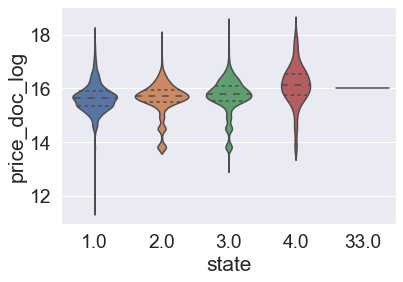

In [35]:
# Зависимость цены от состояния недвижимости
sns.violinplot(x = 'state', y = 'price_doc_log', data = train_df, inner='quartile')
plt.show()

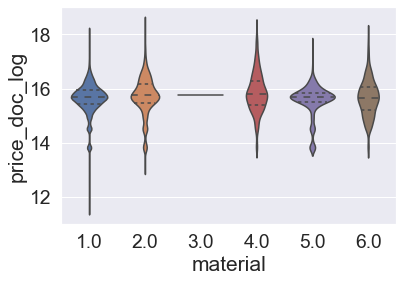

In [36]:
# Цена в зависимости от конструктивного материала стен
sns.violinplot(x = 'material', y = 'price_doc_log', data = train_df, inner='quartile')
plt.show()

#### Матрица корреляций

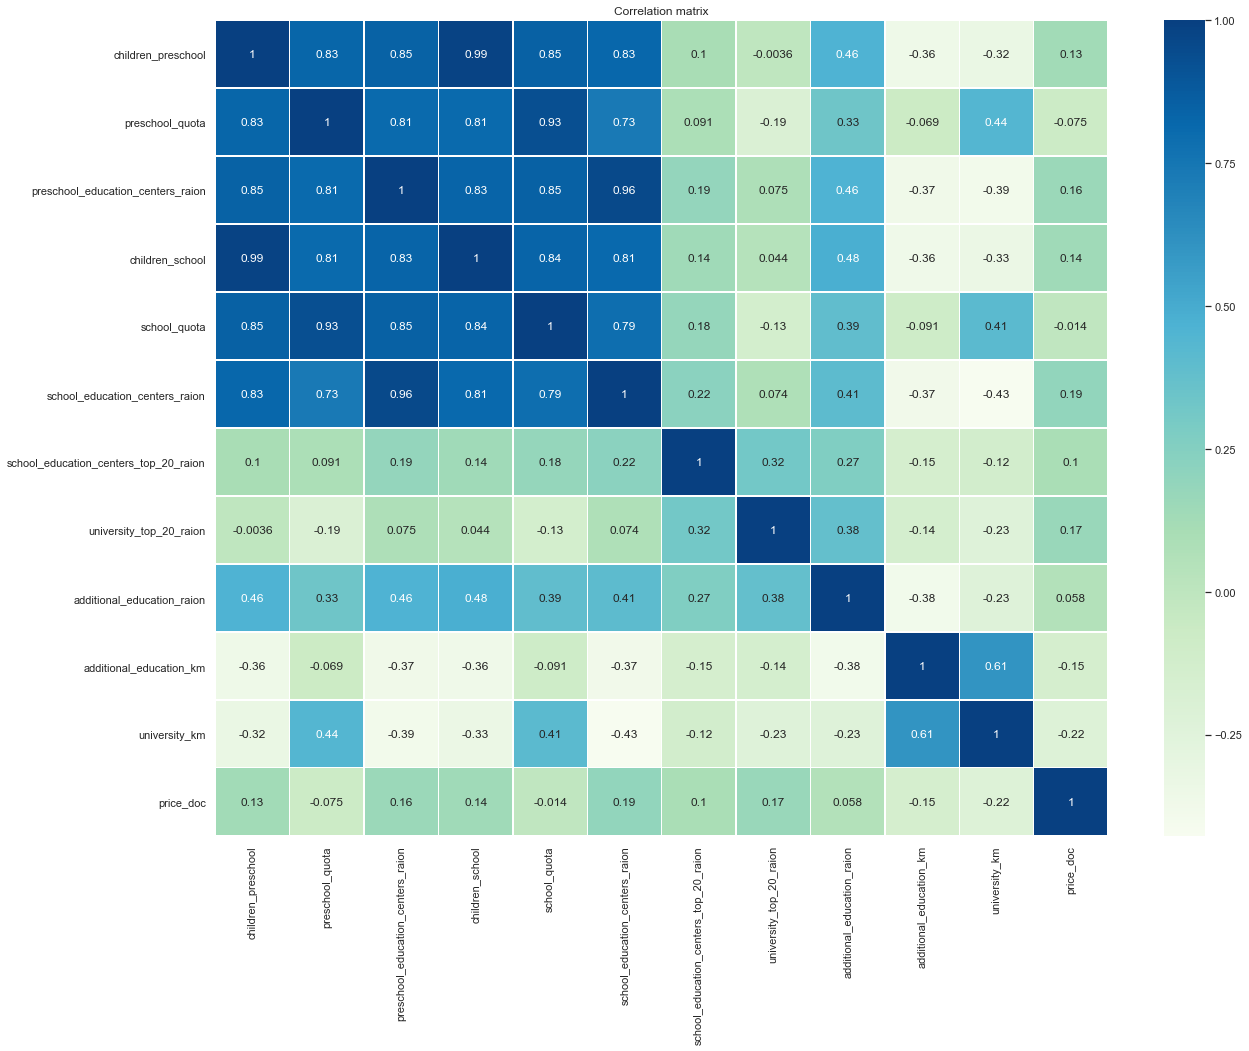

In [39]:
# Матрица корреляций по признакам, связанным с образованием
school_chars = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 
                'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 
                'university_top_20_raion', 'additional_education_raion', 'additional_education_km', 'university_km', 'price_doc']
corrmat1 = train_df[school_chars].corr()
plt.figure(figsize = (20,15))

sns.set(font_scale=1.0)
ax = sns.heatmap(corrmat1, annot=True, linewidths=.5, cmap='GnBu')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.xticks(rotation='90')
plt.yticks(rotation='0')
plt.title('Correlation matrix')
plt.show()

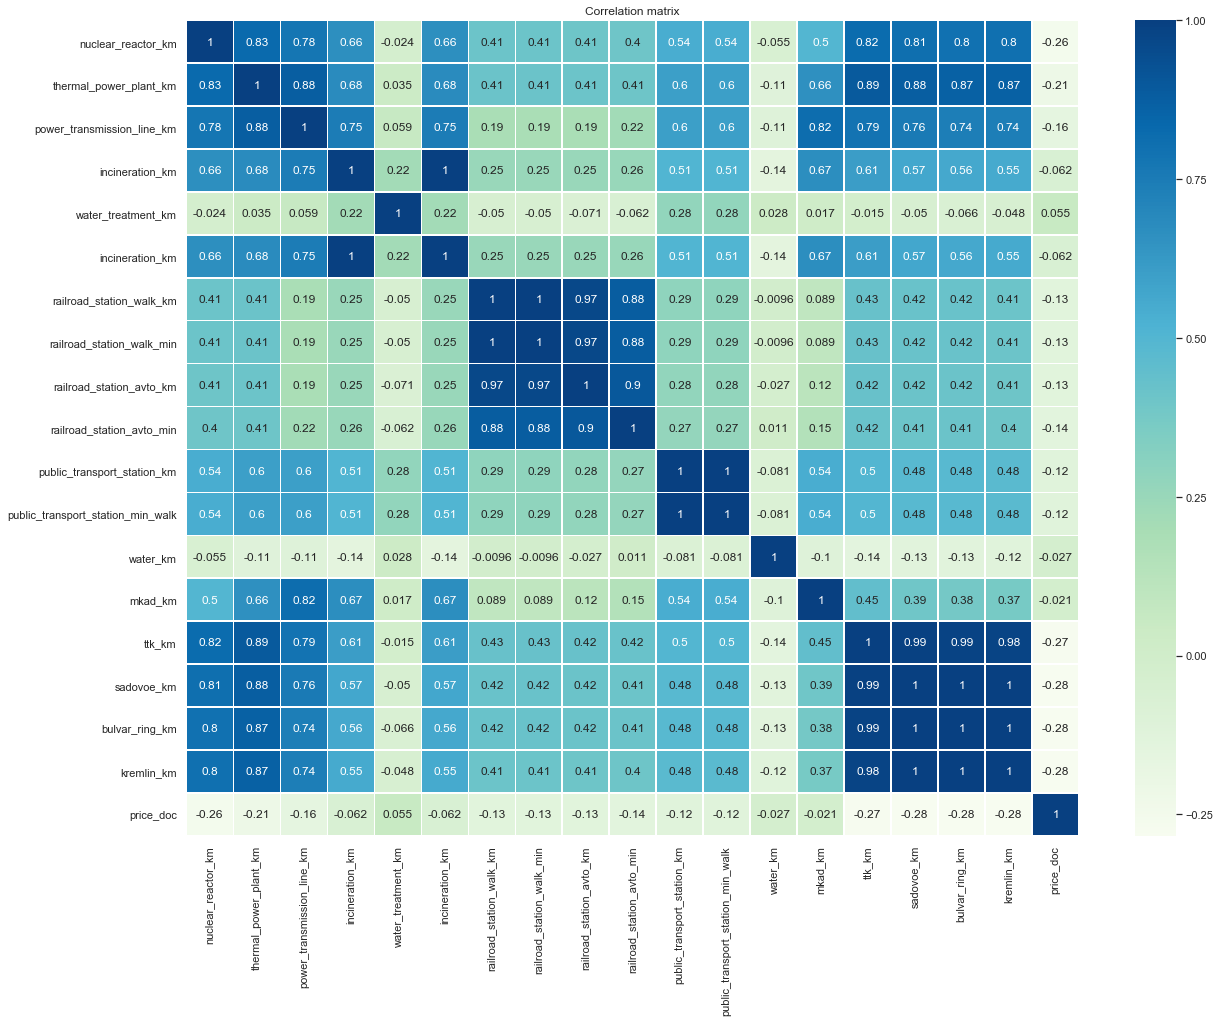

In [40]:
# Матрица корреляций по признакам, связанным с инфраструктурой
inf_features = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km', 'incineration_km',
                'water_treatment_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 
                'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 
                'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km',
                'kremlin_km', 'price_doc']
corrmat2 = train_df[inf_features].corr()

plt.figure(figsize = (20,15))

sns.set(font_scale=1.0)
ax = sns.heatmap(corrmat2 , annot=True, linewidths=.5, cmap='GnBu')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.xticks(rotation='90')
plt.yticks(rotation='0')
plt.title('Correlation matrix')
plt.show()

### Преобразование данных, очистка

#### Загрузка данных и выделение целевой переменной из датасета

In [82]:
sber_train = pd.read_csv(DATASET_PATH, parse_dates=['timestamp'])
sber_test = pd.read_csv(TEST_DATASET_PATH, parse_dates=['timestamp'])
sber_macro = pd.read_csv(MACRO_DATASET_PATH, parse_dates=['timestamp'])

In [83]:
sber_train_price = sber_train[['id', 'price_doc']].copy()
sber_train.drop('price_doc', axis = 1, inplace = True)
len(sber_train.columns)

291

#### Объединение train и test

In [84]:
Sber_all = pd.concat([sber_train, sber_test])
Sber_all.shape

(38133, 291)

#### Удаление признаков, имеющих малую вариативность, удаление индексов

In [85]:
zero_variance = ['culture_objects_top_25_raion', 'oil_chemistry_raion', 'railroad_terminal_raion', 'nuclear_reactor_raion',
'build_count_foam', 'big_road1_1line', 'railroad_1line', 'office_sqm_500', 'trc_sqm_500',
'cafe_count_500_price_4000', 'cafe_count_500_price_high', 'mosque_count_500', 'leisure_count_500',
'office_sqm_1000', 'trc_sqm_1000', 'cafe_count_1000_price_high', 'mosque_count_1000', 'cafe_count_1500_price_high',
'mosque_count_1500', 'cafe_count_2000_price_high']
useless_ids = ['ID_metro', 'ID_railroad_station_walk', 'ID_railroad_station_avto', 'ID_big_road1', 'ID_big_road2',
'ID_railroad_terminal', 'ID_bus_terminal']

In [86]:
Sber_all.drop(zero_variance + useless_ids, axis = 1, inplace = True)
Sber_all.shape

(38133, 264)

#### Замена выброса признака state

In [87]:
Sber_all['state'].value_counts()

2.0     8506
3.0     7703
1.0     7121
4.0      549
33.0       1
Name: state, dtype: int64

In [88]:
Sber_all['state'].replace(to_replace = 33, value = 3, inplace = True)

#### Замена выбросов признака build_year

In [89]:
Sber_all['build_year'].value_counts()

2014.0    1118
2015.0    1083
0.0        899
2016.0     775
2013.0     724
          ... 
2.0          1
1904.0       1
1691.0       1
1908.0       1
20.0         1
Name: build_year, Length: 127, dtype: int64

In [90]:
bld_yr_replace = {20052009:2005, 0:np.nan, 1:np.nan, 2:np.nan, 3:np.nan, 20:2000, 215:2015, 4965:1965, 71:1971}
Sber_all['build_year'].replace(to_replace = bld_yr_replace, inplace = True)

#### Замена выбросов признака material

In [91]:
Sber_all['material'].value_counts()

1.0    19438
2.0     3951
5.0     2048
4.0     1963
6.0     1159
3.0        2
Name: material, dtype: int64

In [92]:
Sber_all['material'].replace(to_replace = 3, value = 1, inplace = True)

#### Замена нулевых значений признака full_sq 

In [93]:
Sber_all['full_sq'].describe()

count    38133.000000
mean        54.111172
std         35.171162
min          0.000000
25%         38.900000
50%         50.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

In [94]:
Sber_all['full_sq'].replace(to_replace = 0, value = np.nan, inplace = True)

#### Замена нулевых значений признака num_room

In [95]:
Sber_all['num_room'].describe()

count    28561.000000
mean         1.900844
std          0.847620
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: num_room, dtype: float64

In [96]:
Sber_all['num_room'].replace(to_replace = 0, value = np.nan, inplace = True)

#### Замена выбросов признака max_floor 

In [97]:
Sber_all['max_floor'].value_counts()

17.0     6499
9.0      4029
5.0      3033
12.0     2966
14.0     1801
16.0     1571
1.0      1375
22.0      963
25.0      956
0.0       783
24.0      576
8.0       414
3.0       405
10.0      404
15.0      371
4.0       336
20.0      321
18.0      290
19.0      289
6.0       191
7.0       174
23.0      142
2.0       136
13.0      113
11.0      111
21.0       85
30.0       58
40.0       30
27.0       21
32.0       18
26.0       17
48.0       13
29.0       13
28.0       11
37.0        8
31.0        5
39.0        5
33.0        5
34.0        3
35.0        3
99.0        3
41.0        2
38.0        2
47.0        2
45.0        2
36.0        2
57.0        1
44.0        1
117.0       1
42.0        1
Name: max_floor, dtype: int64

In [98]:
max_flr_replace = {117:17, 99:np.nan, 0:np.nan}
Sber_all['max_floor'].replace(to_replace = max_flr_replace, inplace = True)

#### Замена нулевых значений признака life_sq 

In [99]:
Sber_all['life_sq'].describe()

count    30574.000000
mean        34.033460
std         47.581529
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [100]:
Sber_all['life_sq'].replace(to_replace = 0, value = np.nan, inplace = True)

In [101]:
# жилая площадь не может быть больше общей
Sber_all[Sber_all['full_sq'] < Sber_all['life_sq']]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,radiation_raion,big_market_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,trc_count_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,big_church_count_500,church_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,big_church_count_1000,church_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,big_church_count_1500,church_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_p

#### Замена общей площади = 1 жилой площадью

In [102]:
Sber_all.loc[Sber_all['full_sq'] == 1, 'full_sq'] = Sber_all.loc[Sber_all['full_sq'] == 1, 'life_sq']

#### Замена общей площади < 20 жилой площадью

In [103]:
Sber_all.loc[(Sber_all['full_sq'] < Sber_all['life_sq']) & (Sber_all['full_sq'] < 20), 'full_sq'] = \
Sber_all.loc[(Sber_all['full_sq'] < Sber_all['life_sq']) & (Sber_all['full_sq'] < 20), 'life_sq']

#### Замена жилой площади, если общая площадь меньше жилой

In [104]:
Sber_all.loc[Sber_all['full_sq'] < Sber_all['life_sq'], 'life_sq'] = \
    (Sber_all.loc[Sber_all['full_sq'] < Sber_all['life_sq'], 'full_sq'] - \
    Sber_all.loc[Sber_all['full_sq'] < Sber_all['life_sq'], 'kitch_sq'])*0.7

#### Количество KitchenSquare со значением 0

In [105]:
Sber_all[Sber_all['kitch_sq'] == 0].shape[0]

1757

#### Замена нулевых значений признака kitch_sq

In [106]:
Sber_all['kitch_sq'].replace(to_replace = 0, value = np.nan, inplace = True)

#### Площадь кухни- количество квартир

In [107]:
Sber_all['kitch_sq'].value_counts().sort_values()

46.2        1
47.0        1
620.0       1
17.5        1
26.0        1
         ... 
6.0      2528
10.0     2554
5.0      2611
8.0      2803
1.0      6606
Name: kitch_sq, Length: 280, dtype: int64

#### Замена выброса значений kitch_sq и значений <3 значением 3

In [108]:
Sber_all.loc[(Sber_all['kitch_sq'] < 3)|(Sber_all['kitch_sq'] > 500), 'kitch_sq'] = 3

In [109]:
# площадь кухни не может быть больше общей площади
Sber_all[Sber_all['full_sq'] < Sber_all['kitch_sq']]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,radiation_raion,big_market_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,trc_count_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,big_church_count_500,church_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,big_church_count_1000,church_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,big_church_count_1500,church_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_p

In [110]:
Sber_all.loc[Sber_all['full_sq'] < Sber_all['kitch_sq'], 'kitch_sq'] = \
   Sber_all.loc[Sber_all['full_sq'] < Sber_all['kitch_sq'], 'full_sq'] * 0.15

In [111]:
# количество этажей в доме не может быть меньше этажа квартиры
Sber_all[Sber_all['max_floor'] < Sber_all['floor']]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,radiation_raion,big_market_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,trc_count_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,big_church_count_500,church_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,big_church_count_1000,church_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,big_church_count_1500,church_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_p

#### Замена значения floor значением max_floor, если max_floor < floor

In [112]:
Sber_all.loc[Sber_all['floor'] > Sber_all['max_floor'], 'floor'] = \
Sber_all.loc[Sber_all['floor'] > Sber_all['max_floor'], 'max_floor']

### Feature engineering

In [113]:
#Дополнительные временные признаки
Sber_all['year'] = Sber_all.timestamp.dt.year
Sber_all['month'] = Sber_all.timestamp.dt.month
Sber_all['dow'] = Sber_all.timestamp.dt.dayofweek

In [114]:
# признак с количеством лет здания
Sber_all['years_old'] = 2021 - Sber_all['build_year']

In [115]:
# Доля жилой площади
# Доля площади кухни
Sber_all['resident_to_total_ratio'] = Sber_all['life_sq']/Sber_all['full_sq']
Sber_all['kitchen_to_total_ratio'] = Sber_all['kitch_sq']/Sber_all['full_sq']

In [116]:
# Средняя площадь комнаты
Sber_all['avg_room_area'] = Sber_all['life_sq']/Sber_all['num_room']

In [117]:
# Разница между общей и жилой площадями
Sber_all['extra_area'] = Sber_all['full_sq'] - Sber_all['life_sq']
Sber_all['extra_area_ratio'] = Sber_all['extra_area']/Sber_all['full_sq']

In [118]:
# Доля работающих людей в районе:
Sber_all['pct_labor_force'] = Sber_all['work_all']/Sber_all['raion_popul']

In [119]:
# этаж квартиры относительно количества этажей в доме
Sber_all['floor_rel_total'] = Sber_all['floor']/Sber_all['max_floor']

In [120]:
# Доля детей школьного возраста к числу доступных мест в школах
Sber_all['ratio_school_age_seats'] = Sber_all['children_school']/Sber_all['school_quota']
Sber_all['ratio_preschool_age_seats'] = Sber_all['children_preschool']/Sber_all['preschool_quota']

In [121]:
# Доли жителей разного возраста
Sber_all['young_proportion'] = Sber_all['young_all']/Sber_all['full_all']
Sber_all['work_proportion'] = Sber_all['work_all']/Sber_all['full_all']
Sber_all['retire_proportion'] = Sber_all['ekder_all']/Sber_all['full_all']
Sber_all['female_to_male'] = Sber_all['female_f']/Sber_all['male_f']

In [122]:
# Дополнительные флаги
Sber_all['metro_flag'] = np.where(Sber_all['raion_popul'] > 150000, 1, 0)
Sber_all['large_flag'] = np.where(Sber_all['max_floor'] >= 17, 1, 0)
Sber_all['small_flag'] = np.where(Sber_all['max_floor'] <= 17, 1, 0)

In [124]:
# среднее число этажей в домах по районам
sub_area_means = Sber_all.groupby('sub_area').agg({'max_floor':np.mean}). \
reset_index().rename(columns={'max_floor':'mean_bldg_max_fl'})
Sber_all = pd.merge(Sber_all, sub_area_means, on = ['sub_area'], how = 'left')

In [125]:
# Продажи по месяцам
n_sales_months = Sber_all.groupby(['year', 'month']).size().reset_index().rename(columns={0:'n_sales_month'})
Sber_all = pd.merge(Sber_all, n_sales_months, on = ['year', 'month'], how = 'left')

In [128]:
# Среднее расстояние до кремля от района
dist_to_kremlin = Sber_all.groupby('sub_area').agg({'kremlin_km':np.nanmean}).reset_index().rename(columns={'kremlin_km':'subarea_dist_to_kremlin'})
Sber_all = pd.merge(Sber_all, dist_to_kremlin, on = ['sub_area'], how = 'left')


In [129]:
# Количество пропущенных значений по каждой строке
Sber_all['count_nan_per_row'] = Sber_all.isnull().sum(axis = 1)

In [136]:
Sber_all.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,radiation_raion,big_market_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,trc_count_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,big_church_count_500,church_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,big_church_count_1000,church_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,big_church_count_1500,church_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_p

In [131]:
# Название квартиры
Sber_all['apt_name'] = Sber_all['sub_area'] + Sber_all['metro_km_avto'].astype(str).apply(lambda x: x[0:5])

In [134]:
Sber_all['apt_name_yrmo'] = Sber_all['apt_name'] + Sber_all['year'].astype(str) + Sber_all['month'].astype(str)

In [135]:
# full_sq_floored:
Sber_all['full_sq_floored'] = Sber_all['full_sq'].apply(lambda x: max(x, 50))

#### Добавление датасета с макроэкономическими показателями

In [137]:
macro_cols = ["timestamp","balance_trade","balance_trade_growth","eurrub",
              "average_provision_of_build_contract","micex_rgbi_tr","micex_cbi_tr","deposits_rate",
              "mortgage_value","mortgage_rate","income_per_cap","museum_visitis_per_100_cap","apartment_build"]
Sber_all = Sber_all.merge(sber_macro[macro_cols], on='timestamp', how='left')

In [138]:
Sber_all.shape

(38133, 303)

#### Сохранение данных

In [143]:
Sber_all.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

#### Разделение данных на test и train

In [139]:
Sber_train_fe = Sber_all[Sber_all['id'].isin(sber_train_price['id'])]
Sber_train_fe = pd.merge(Sber_train_fe, sber_train_price, on = ['id'], how = 'inner')
Sber_train_fe.shape

(30471, 304)

In [140]:
Sber_test_fe = Sber_all[~Sber_all['id'].isin(sber_train_price['id'])]
Sber_test_fe.shape

(7662, 303)

#### Избавление от экстремальных значений цены за квадратный метр

In [141]:
Sber_train_fe = Sber_train_fe[Sber_train_fe.price_doc/Sber_train_fe.full_sq_floored <= 600000]
Sber_train_fe = Sber_train_fe[Sber_train_fe.price_doc/Sber_train_fe.full_sq_floored >= 10000]
Sber_train_fe.shape

(30428, 304)

#### Логарифмирование целевой переменной

In [142]:
Sber_train_fe['price_doc'] = Sber_train_fe['price_doc'].apply(lambda x: np.log1p(x))
Sber_train_fe['price_doc'].describe()

count    30428.000000
mean        15.612321
std          0.598456
min         13.122365
25%         15.372747
50%         15.653772
75%         15.931766
max         18.370676
Name: price_doc, dtype: float64

### Построение модели

#### Подключение библиотек

In [144]:
import lightgbm as lgb

#### Подготовка данных

In [145]:
test_id = Sber_test_fe['id'].copy()
train_target = Sber_train_fe['price_doc'].copy()
Sber_train_fe.drop(['id', 'timestamp', 'price_doc'], axis = 1, inplace = True)
Sber_test_fe.drop(['id', 'timestamp'], axis = 1, inplace = True)

C:\Users\Елена\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Преобразование категориальных признаков

In [146]:
Sber_train_fe_n = Sber_train_fe.select_dtypes(exclude=['object'])
Sber_train_fe_c = Sber_train_fe.select_dtypes(include=['object']).copy()
Sber_test_fe_n = Sber_test_fe.select_dtypes(exclude=['object'])
Sber_test_fe_c = Sber_test_fe.select_dtypes(include=['object']).copy()

In [148]:
for c in Sber_train_fe_c:
    Sber_train_fe_c[c] = pd.factorize(Sber_train_fe_c[c])[0]
for c in Sber_test_fe_c:
    Sber_test_fe_c[c] = pd.factorize(Sber_test_fe_c[c])[0]

Sber_train_fe = pd.concat([Sber_train_fe_n, Sber_train_fe_c], axis=1)
Sber_test_fe = pd.concat([Sber_test_fe_n, Sber_test_fe_c], axis=1)

In [149]:
print(Sber_train_fe.shape, Sber_test_fe.shape)

(30428, 301) (7662, 301)


In [157]:
RS = 20210501
np.random.seed(RS)

ROUNDS = 450
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting': 'gbdt',
    'learning_rate': 0.04,
    'verbose': 0,
    'num_leaves': 2 ** 5,
    'bagging_fraction': 0.95,
    'bagging_freq': 1,
    'bagging_seed': RS,
    'feature_fraction': 0.7,
    'feature_fraction_seed': RS,
    'max_bin': 100,
    'max_depth': 5,
    'num_rounds': ROUNDS
}

In [158]:
train_lgb = lgb.Dataset(Sber_train_fe, train_target)

In [165]:
lgb_cv = lgb.cv(params=params, train_set=train_lgb, nfold=6, stratified=False, num_boost_round=ROUNDS,return_cvbooster=True)                

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [166]:
for key, val in lgb_cv.items():
    print("\n" + key, " : ", val)


rmse-mean  :  [0.5899106403714834, 0.5819295264006229, 0.5744564885334899, 0.5675380244921006, 0.5610140557142419, 0.5548227949469516, 0.5490612399908653, 0.5436779671950582, 0.5386300075879905, 0.5338555754244195, 0.5300128340744736, 0.5257394921459365, 0.521792814142893, 0.5180956826011557, 0.5146132055126175, 0.5114022129782302, 0.5082989047403681, 0.5054300089075898, 0.5026869444757297, 0.5002013522120917, 0.4978568053005262, 0.495651692681883, 0.4935550356267046, 0.4915906106004804, 0.48975801780710265, 0.4879611975417448, 0.4863291837762949, 0.48477353972167775, 0.48331727422146603, 0.4821018299582856, 0.48087948570704087, 0.4796574362049853, 0.4785006309233005, 0.4774893058606984, 0.47646185117062084, 0.47549038569534413, 0.4745395107135802, 0.47365007627229355, 0.4728262161347485, 0.4720369574003618, 0.47134492674865136, 0.4706109838853149, 0.4699340055006869, 0.469266406664633, 0.4686721502443627, 0.46808618529778157, 0.4675265778377689, 0.4670062765367697, 0.4664650628020960

In [172]:
model = lgb.train(params, train_lgb, num_boost_round=ROUNDS)
preds_log = model.predict(Sber_test_fe)

C:\Programs\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.132433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [170]:
gain = model.feature_importance('gain')
ft = pd.DataFrame({'feature':model.feature_name(),
                   'split':model.feature_importance('split'),
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
print(ft.head(25))

                        feature  split       gain
0                       full_sq    434  36.196771
276             full_sq_floored     67   4.415259
190             cafe_count_2000     43   3.234403
243  cafe_count_5000_price_2500     39   2.950665
227            sport_count_3000     43   2.715363
212             cafe_count_3000     30   1.607631
6                      num_room     34   1.547957
69               metro_min_avto     65   1.501548
245  cafe_count_5000_price_high     36   1.495223
300               apt_name_yrmo    144   1.308445
1                       life_sq    109   1.305210
5                    build_year    232   1.140346
299                    apt_name    113   0.903076
218  cafe_count_3000_price_1000     17   0.902302
89                       ttk_km     48   0.747884
235             cafe_count_5000     22   0.668984
259                  extra_area    104   0.639013
8                         state     91   0.591538
3                     max_floor    120   0.586645


<Figure size 432x288 with 0 Axes>

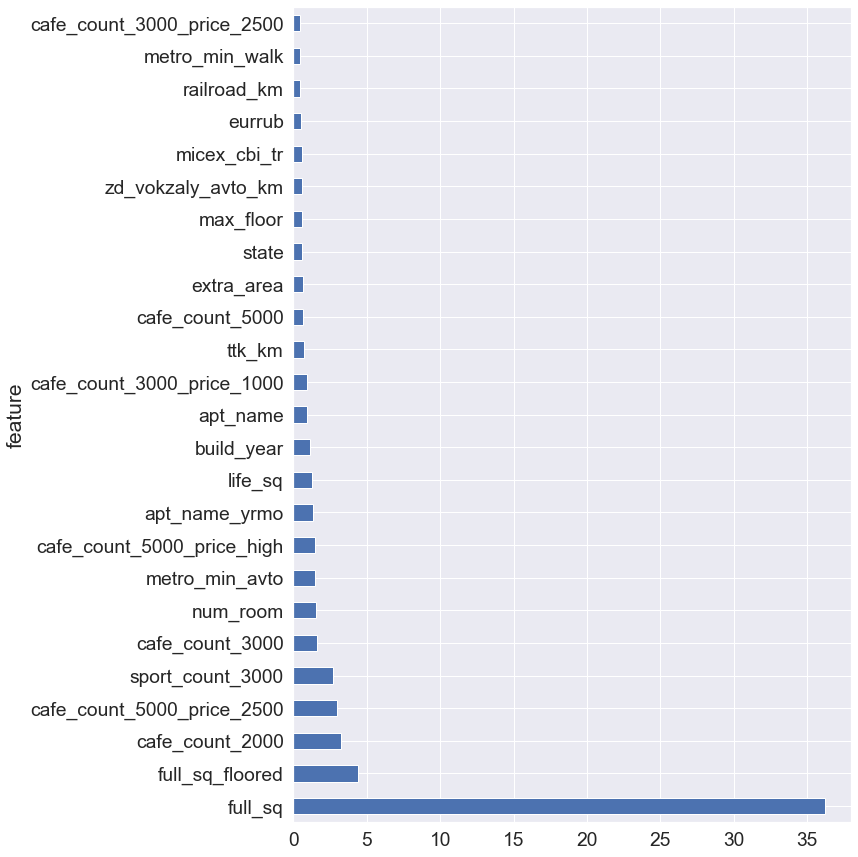

In [173]:
plt.figure()
ft[['feature','gain']].head(25).plot(kind='barh', x='feature', y='gain', legend=False, figsize=(10, 15))
plt.gcf().savefig('features_importance.png')
plt.show()

In [174]:
price_pred = np.exp(preds_log) - 1

lgb_sub = pd.DataFrame({'id':test_id, 'price_doc':price_pred})
lgb_sub.to_csv('predictions.csv', index = False)

In [175]:
lgb_sub.head()

,id,price_doc
30471,30474,5.010179e+06
30472,30475,7.559200e+06
30473,30476,4.632714e+06
30474,30477,5.750044e+06
30475,30478,4.535610e+06
